# FLIGHT DELAY PREDICTION

## Contents
* [Problem Statement](#Problem-Statement)
* [Objectives](#Objectives)
* [Data Acquisition and Exploration](#Data-Acquisition-and-Exploration)
* [Data Preprocessing](#Data-Preprocessing)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Classification Modelling](#Classification-Modelling)
* [Model Evaluation](#Model-Evaluation)


Problem Overview
Flight delays pose a significant concern for global airline companies, leading to substantial financial losses for both the aviation industry and passengers. Between 2012 and 2018, nearly one-fifth of flights from major carriers in the United States experienced delays, impacting the travel experiences of numerous passengers (Bureau of Transport Statistics, 2018). This project aims to leverage machine learning models for the prediction of flight delays.

Definition of a Delayed Flight:

A flight that arrives late at its destination.
If a flight encounters delays during departure but still arrives on time at its destination, it will not be classified as a delayed flight.
A flight that arrives on time is represented as 0.
A delayed flight is denoted as 1.

### Goals
Identify key factors influencing flight delays.
Construct machine learning models for categorizing flight outcomes (delayed or not delayed) based on selected attributes.
Assess the performance of various machine learning models.

In [2]:
pip install azure-ai-ml

  Using cached azure_ai_ml-1.12.0-py3-none-any.whl (8.3 MB)
  Using cached azure_storage_file_share-12.15.0-py3-none-any.whl (267 kB)
  Using cached strictyaml-1.7.3-py3-none-any.whl (123 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 9.7 MB/s eta 0:00:00
  Using cached azure_storage_file_datalake-12.14.0-py3-none-any.whl (251 kB)
  Using cached pydash-7.0.5-py3-none-any.whl (109 kB)
  Using cached marshmallow-3.20.1-py3-none-any.whl (49 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 12.8 MB/s eta 0:00:00


  Attempting uninstall: azure-core
    Found existing installation: azure-core 1.27.1
    Uninstalling azure-core-1.27.1:
      Successfully uninstalled azure-core-1.27.1
  Attempting uninstall: azure-storage-blob
    Found existing installation: azure-storage-blob 12.16.0
    Uninstalling azure-storage-blob-12.16.0:
      Successfully uninstalled azure-storage-blob-12.16.0
  Attempting uninstall: opencensus
    Found existing installation: opencensus 0.11.2
    Uninstalling opencensus-0.11.2:
      Successfully uninstalled opencensus-0.11.2
  Attempting uninstall: msal
    Found existing installation: msal 1.22.0
    Uninstalling msal-1.22.0:
      Successfully uninstalled msal-1.22.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
from azure.identity import DefaultAzureCredential, InteractiveBrowserCredential
from azure.ai.ml import MLClient

try:
    credential = DefaultAzureCredential()
    # Check if given credential can get token successfully.
    credential.get_token("https://management.azure.com/.default")
except Exception as ex:
    # Fall back to InteractiveBrowserCredential in case DefaultAzureCredential not work
    credential = InteractiveBrowserCredential()

In [2]:

# Get a handle to workspace
ml_client = MLClient.from_config(credential=credential)

Found the config file in: /config.json


### Data Acquisition and Exploration

In [8]:
pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Dependencies
%matplotlib inline

# Begin Python Imports
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

#### Import data

In [15]:
pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 63.7 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Read 2018 airport data
flight_data = pd.read_csv('2018.csv')

# Check first 2 instances and last 2 instances
flight_data.head(2).append(flight_data.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
7213444,2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
7213445,2018-12-31,AA,1818,RDU,CLT,1435,1443.0,8.0,8.0,1451.0,1535.0,7.0,1546,1542.0,-4.0,0.0,NaN,0.0,71.0,59.0,44.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN


#### Dataset exploration

In [5]:
# Check dimension of dataset
flight_data.shape
print("There are "+ str(flight_data.shape[0]) +" rows and "+ str(flight_data.shape[1]) +" columns from the flight dataset.")

There are 7213446 rows and 28 columns from the flight dataset.


In [6]:
# Convert flight_data column to datetime format
flight_data['FL_DATE'] =  pd.to_datetime(flight_data['FL_DATE'], format='%Y-%m-%d')

In [7]:
# Check column type
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 28 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         int64         
 6   DEP_TIME             float64       
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           float64       
 10  WHEELS_ON            float64       
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         int64         
 13  ARR_TIME             float64       
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

#### Metadata

<b>FL_DATE</b> = Date of the Flight<br>
<b>OP_CARRIER</b> = Airline Identifier<br>
<b>OP_CARRIER_FL_NUM</b> = Flight Number<br>
<b>ORIGIN</b> = Starting Airport Code<br>
<b>DEST</b> = Destination Airport Code<br>
<b>CRS_DEP_TIME</b> = Planned Departure Time<br>
<b>DEP_TIME</b> = Actual Departure Time<br>
<b>DEP_DELAY</b> = Total Delay on Departure in minutes<br>
<b>TAXI_OUT</b> = The time duration elapsed between departure from the origin airport gate and wheels off<br>
<b>WHEELS_OFF</b> = The time point that the aircraft's wheels leave the ground<br>
<b>WHEELS_ON</b> = The time point that the aircraft'ss wheels touch on the ground<br>
<b>TAXI_IN</b> = The time duration elapsed between wheels-on and gate arrival at the destination airport<br>
<b>CRS_ARR_TIME</b> = Planned arrival time<br>
<b>ARR_TIME</b> = Actual Arrival Time = ARRIVAL_TIME - SCHEDULED_ARRIVAL<br>
<b>ARR_DELAY</b> = Total Delay on Arrival in minutes<br>
<b>CANCELLED</b> = Flight Cancelled (1 = cancelled)<br>
<b>CANCELLATION_CODE</b> = Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security<br>
<b>DIVERTED</b> = Aircraft landed on different airport that the one scheduled<br>
<b>CRS_ELAPSED_TIME</b> = Planned time amount needed for the flight trip<br>
<b>ACTUAL_ELAPSED_TIME</b> = AIR_TIME+TAXI_IN+TAXI_OUT<br>
<b>AIR_TIME</b> = The time duration between wheels_off and wheels_on time<br>
<b>DISTANCE</b> = Distance between two airports<br>
<b>CARRIER_DELAY</b> = Delay caused by the airline in minutes<br>
<b>WEATHER_DELAY</b> = Delay caused by weather<br>
<b>NAS_DELAY</b> = Delay caused by air system<br>
<b>SECURITY_DELAY</b> = caused by security reasons<br>
<b>LATE_AIRCRAFT_DELAY</b> = Delay caused by security<br>

### Data Preprocessing

* [Handle of missing data](#Handle-of-missing-data)
* [Transformation of Duration time taken](#Transformation-of-Duration-time-taken)
* [Rename of OP_CARRIER](#Rename-of-OP_CARRIER)
* [Transformation of Date](#Transformation-of-Date)
* [Data reduction: Focus on Busy Airports](#Data-reduction:-Focus-on-Busy-Airports)
* [Rename of airports and city](#Rename-of-airports-and-city)
* [Transformation of Target attribute: Flight status](#Transformation-of-Target-attribute:-Flight-status)

#### Handle of missing data

In [8]:
# Calculate the proportion of missing data

def checkMissing(data,perc=0):
    """
    Takes in a dataframe and returns
    the percentage of missing value.
    """
    missing = [(i, data[i].isna().mean()*100) for i in data]
    missing = pd.DataFrame(missing, columns=["column_name", "percentage"])
    missing = missing[missing.percentage > perc]
    print(missing.sort_values("percentage", ascending=False).reset_index(drop=True))

print("Proportion of missing data in columns")
checkMissing(flight_data)

Proportion of missing data in columns
            column_name  percentage
0           Unnamed: 27  100.000000
1     CANCELLATION_CODE   98.383796
2   LATE_AIRCRAFT_DELAY   81.247382
3         CARRIER_DELAY   81.247382
4         WEATHER_DELAY   81.247382
5             NAS_DELAY   81.247382
6        SECURITY_DELAY   81.247382
7             ARR_DELAY    1.899785
8   ACTUAL_ELAPSED_TIME    1.863769
9              AIR_TIME    1.863769
10            WHEELS_ON    1.653107
11              TAXI_IN    1.653107
12             ARR_TIME    1.653093
13            DEP_DELAY    1.625215
14             TAXI_OUT    1.605751
15           WHEELS_OFF    1.605737
16             DEP_TIME    1.557051
17     CRS_ELAPSED_TIME    0.000139


These columns are dropped: `Unnamed: 27`, `CANCELLATION_CODE`, `LATE_AIRCRAFT_DELAY`, `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY` and `SECURITY_DELAY` from the dataframe as these columns had more than 50% of missing values which does not provide any useful information to our analysis. Since our main objective is to predict flight delay, column `CANCELLED` is irrelevant to our scope of work as a canceled flight is not a delayed flight as it never left nor arrived to its destination for whatever reason. `OP_CARRIER_FL_NUM` is also not relevant to our predictions.

After further investigation on the dataset,  `LATE_AIRCRAFT_DELAY`, `CARRIER_DELAY`, `WEATHER_DELAY`, `NAS_DELAY` and `SECURITY_DELAY` are showing the split of delayed minutes for the flight. Thus, the missing data is actually implying that there is no delay for the instance. The missing values for these attributes are imputed with zero.

In [9]:
#Fill the missing value 0
flight_data['LATE_AIRCRAFT_DELAY']=flight_data['LATE_AIRCRAFT_DELAY'].fillna(0)
flight_data['CARRIER_DELAY']=flight_data['CARRIER_DELAY'].fillna(0)
flight_data['WEATHER_DELAY']=flight_data['WEATHER_DELAY'].fillna(0)
flight_data['NAS_DELAY']=flight_data['NAS_DELAY'].fillna(0)
flight_data['SECURITY_DELAY']=flight_data['SECURITY_DELAY'].fillna(0)

#### Transformation of Duration time taken
Checking on the calculation for Departure Delay and Arrival Delay in minutes

The derivation of the delayed time of departure and delayed time of arrival is as shown below:
- DEP_DELAY = CRS_DEP_TIME - DEP_TIME
- ARR_DELAY = ARR_TIME - CRS_ARR_TIME

`CRS_DEP_TIME`, `DEP_TIME`, `CRS_ARR_TIME` and `ARR_TIME` can be eliminated as`DEP_DELAY` and `ARR_DELAY` are informative enough to provide the length of time of the delay in minutes.

In [10]:
# Function that convert the 'HHMM' string to datetime.time
def format_heure(chaine):
    if pd.isnull(chaine):
        return np.nan
    else:
        if chaine == 2400: chaine = 0
        chaine = "{0:04d}".format(int(chaine))
        heure = datetime.time(int(chaine[0:2]), int(chaine[2:4]))
        return heure
        # return pd.to_datetime(heure, format='%H:%M:%S')

    # pd.to_datetime(heure, format='%Y-%m-%d')

In [11]:
flight_data['DEP_TIME'] = flight_data['DEP_TIME'].apply(format_heure)
flight_data['CRS_DEP_TIME'] = flight_data['CRS_DEP_TIME'].apply(format_heure)

flight_data['ARR_TIME'] = flight_data['ARR_TIME'].apply(format_heure)
flight_data['CRS_ARR_TIME'] = flight_data['CRS_ARR_TIME'].apply(format_heure)

flight_data['WHEELS_OFF'] = flight_data['WHEELS_OFF'].apply(format_heure)
flight_data['WHEELS_ON'] = flight_data['WHEELS_ON'].apply(format_heure)

Obtain duration of time taken for:
- Flight take off and wheels off
- Flight on land and wheels on

In [12]:
# Convert flight_data column to datetime format

def time_difference(actual,plan):
    actual_time = pd.to_timedelta(actual.astype(str))
    plan_time = pd.to_timedelta(plan.astype(str))
    return actual_time.sub(plan_time).dt.total_seconds().div(60)

flight_data['WHEELS_OFF_elapse'] =  time_difference(flight_data['WHEELS_OFF'],flight_data['DEP_TIME'])
flight_data['WHEELS_ON_elapse'] =  time_difference(flight_data['ARR_TIME'] ,flight_data['WHEELS_ON'])

# Remove incorrect record
flight_data=flight_data[flight_data['WHEELS_OFF_elapse']>0]
flight_data=flight_data[flight_data['WHEELS_ON_elapse']>0]

In [13]:
# Check first 2 instances and last 2 instances
flight_data.head(2).append(flight_data.tail(2))

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,WHEELS_OFF_elapse,WHEELS_ON_elapse
0,2018-01-01,UA,2429,EWR,DEN,15:17:00,15:12:00,-5.0,15.0,15:27:00,17:12:00,10.0,17:45:00,17:22:00,-23.0,0.0,NaN,0.0,268.0,250.0,225.0,1605.0,0.0,0.0,0.0,0.0,0.0,NaN,15.0,10.0
1,2018-01-01,UA,2427,LAS,SFO,11:15:00,11:07:00,-8.0,11.0,11:18:00,12:23:00,7.0,12:54:00,12:30:00,-24.0,0.0,NaN,0.0,99.0,83.0,65.0,414.0,0.0,0.0,0.0,0.0,0.0,NaN,11.0,7.0
7213444,2018-12-31,AA,1818,CLT,RDU,13:00:00,13:23:00,23.0,11.0,13:34:00,14:00:00,4.0,13:50:00,14:04:00,14.0,0.0,NaN,0.0,50.0,41.0,26.0,130.0,0.0,0.0,0.0,0.0,0.0,NaN,11.0,4.0
7213445,2018-12-31,AA,1818,RDU,CLT,14:35:00,14:43:00,8.0,8.0,14:51:00,15:35:00,7.0,15:46:00,15:42:00,-4.0,0.0,NaN,0.0,71.0,59.0,44.0,130.0,0.0,0.0,0.0,0.0,0.0,NaN,8.0,7.0


In [14]:
# Check column type
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7051259 entries, 0 to 7213445
Data columns (total 30 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   OP_CARRIER_FL_NUM    int64         
 3   ORIGIN               object        
 4   DEST                 object        
 5   CRS_DEP_TIME         object        
 6   DEP_TIME             object        
 7   DEP_DELAY            float64       
 8   TAXI_OUT             float64       
 9   WHEELS_OFF           object        
 10  WHEELS_ON            object        
 11  TAXI_IN              float64       
 12  CRS_ARR_TIME         object        
 13  ARR_TIME             object        
 14  ARR_DELAY            float64       
 15  CANCELLED            float64       
 16  CANCELLATION_CODE    object        
 17  DIVERTED             float64       
 18  CRS_ELAPSED_TIME     float64       
 19  ACTUAL_ELAPSED_TIME  

In [15]:
#check_depart = flight_data[flight_data['DEP_DELAY_c'] != flight_data['DEP_DELAY']]
#check_arrival = flight_data[flight_data['ARR_DELAY_c'] != flight_data['ARR_DELAY']]

#print("The duration of delayed which is not tally:")
#print("For time taken of departure delay")
#print(check_depart.shape)
#print()
#print("For time taken of arrival delay")
#print(check_arrival.shape)

In [16]:
#check_depart.loc[:,['DEP_TIME','CRS_DEP_TIME','DEP_DELAY_c','DEP_DELAY']]

In [17]:
#check_arrival.loc[:,['ARR_TIME','CRS_ARR_TIME','ARR_DELAY_c','ARR_DELAY']]

In [18]:
# Drop the unused columns

flight_data.drop(['Unnamed: 27',
                  'CANCELLATION_CODE',
                  'CANCELLED',
                  'OP_CARRIER_FL_NUM',
                  'CRS_DEP_TIME',
                  'DEP_TIME',
                  'CRS_ARR_TIME',
                  'ARR_TIME',
                  'WHEELS_ON',
                  'WHEELS_OFF'
                 ],
                 axis = 1, inplace = True)

Imputation with cold-deck method may introduce noise to the data, so to avoid that to interfere the overall performance, Since we will just drop those missing rows as the percentage of missing values is just 1%.

In [19]:
#Check number of missing values
flight_data.isna().sum()

FL_DATE                    0
OP_CARRIER                 0
ORIGIN                     0
DEST                       0
DEP_DELAY               4735
TAXI_OUT                   0
TAXI_IN                    0
ARR_DELAY              17560
DIVERTED                   0
CRS_ELAPSED_TIME           7
ACTUAL_ELAPSED_TIME    14962
AIR_TIME               14962
DISTANCE                   0
CARRIER_DELAY              0
WEATHER_DELAY              0
NAS_DELAY                  0
SECURITY_DELAY             0
LATE_AIRCRAFT_DELAY        0
WHEELS_OFF_elapse          0
WHEELS_ON_elapse           0
dtype: int64

In [20]:
flight_data = flight_data.dropna()

In [21]:
#Check number of missing values
flight_data.isna().sum()

FL_DATE                0
OP_CARRIER             0
ORIGIN                 0
DEST                   0
DEP_DELAY              0
TAXI_OUT               0
TAXI_IN                0
ARR_DELAY              0
DIVERTED               0
CRS_ELAPSED_TIME       0
ACTUAL_ELAPSED_TIME    0
AIR_TIME               0
DISTANCE               0
CARRIER_DELAY          0
WEATHER_DELAY          0
NAS_DELAY              0
SECURITY_DELAY         0
LATE_AIRCRAFT_DELAY    0
WHEELS_OFF_elapse      0
WHEELS_ON_elapse       0
dtype: int64

#### Rename of OP_CARRIER

`OP_CARRIER` refers to the airline identifier recorded with its abbreviation form. To make the content more intuitive, the column of abbreviation names are transformed with airlines extended names. The main reference source for the extended name is obtained from <a href="https://en.wikipedia.org/wiki/List_of_airlines_of_the_United_States">Wikipedia</a>


In [22]:
# Check the instances for OP_CARRIER
flight_data.OP_CARRIER.unique()

array(['UA', 'AS', '9E', 'B6', 'EV', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH',
       'OO', 'VX', 'WN', 'YV', 'YX', 'AA', 'DL'], dtype=object)

In [23]:
flight_data['OP_CARRIER'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

In [24]:
flight_data.OP_CARRIER.nunique()

18

In [25]:
flight_data.OP_CARRIER.value_counts()

Southwest Airlines    1326376
Delta Airlines         938464
American Airlines      892021
SkyWest Airlines       758717
United Airlines        609226
Republic Airways       303927
JetBlue Airways        293075
Envoy Air              283788
PSA Airlines           264929
Alaska Airlines        240352
Endeavor Air           231211
Mesa Airline           208382
ExpressJet             196072
Spirit Airlines        171359
Frontier Airlines      116058
Allegiant Air           94982
Hawaiian Airlines       83161
Virgin America          17012
Name: OP_CARRIER, dtype: int64

#### Data reduction: Focus on Busy Airports
Even though a lot of pre-processing and cleaning has been done on a separate notebook, this one will be only aiming to obtain a final dataframe for the modeling which will have the top 20 cities only. The reason to do it this way is because the DEST feature is a categorical column of 358 values. The hot encoding will then be done for this 20 instead of the 358 total destinations.  

In [26]:
flight_data.DEST.value_counts().iloc[:20]

ATL    384813
ORD    322119
DFW    271096
DEN    232583
CLT    225450
LAX    217452
SFO    171824
PHX    171433
IAH    170255
LGA    162095
LAS    158721
MSP    156532
DTW    154229
BOS    142239
SEA    137829
EWR    137238
MCO    135272
DCA    127517
JFK    122315
PHL    112410
Name: DEST, dtype: int64

In [27]:
top_cities = flight_data.DEST.value_counts().iloc[0:1].rename_axis('DEST').reset_index(name='TOTAL_FLIGHTS')
top_cities.head()

,DEST,TOTAL_FLIGHTS
0,ATL,384813


In [28]:
# Checking the cities within the numpy array just to verify that it worked
top_cities.DEST.unique()

# Creating a list with top cities only:
city_list = top_cities['DEST'].tolist()

In [29]:
boolean_series =  flight_data.DEST.isin(city_list)
flight_data =  flight_data[boolean_series]
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse
13,2018-01-01,United Airlines,EWR,ATL,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0
241,2018-01-01,United Airlines,EWR,ATL,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0
349,2018-01-01,United Airlines,EWR,ATL,0.0,14.0,5.0,-17.0,0.0,154.0,137.0,118.0,746.0,0.0,0.0,0.0,0.0,0.0,14.0,5.0
517,2018-01-01,United Airlines,IAH,ATL,201.0,12.0,7.0,184.0,0.0,121.0,104.0,85.0,689.0,0.0,0.0,132.0,0.0,52.0,12.0,7.0
686,2018-01-01,United Airlines,EWR,ATL,9.0,26.0,5.0,5.0,0.0,154.0,150.0,119.0,746.0,0.0,0.0,0.0,0.0,0.0,26.0,5.0


In [30]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384813 entries, 13 to 7213438
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   FL_DATE              384813 non-null  datetime64[ns]
 1   OP_CARRIER           384813 non-null  object        
 2   ORIGIN               384813 non-null  object        
 3   DEST                 384813 non-null  object        
 4   DEP_DELAY            384813 non-null  float64       
 5   TAXI_OUT             384813 non-null  float64       
 6   TAXI_IN              384813 non-null  float64       
 7   ARR_DELAY            384813 non-null  float64       
 8   DIVERTED             384813 non-null  float64       
 9   CRS_ELAPSED_TIME     384813 non-null  float64       
 10  ACTUAL_ELAPSED_TIME  384813 non-null  float64       
 11  AIR_TIME             384813 non-null  float64       
 12  DISTANCE             384813 non-null  float64       
 13  CARRIER_DELA

#### Transformation for Date

In [31]:
import calendar
flight_date=pd.DatetimeIndex(flight_data['FL_DATE'])

flight_data['DAY'] = flight_date.day
flight_data['MONTH'] = flight_date.month
flight_data['MONTH_AB'] = flight_data['MONTH'].apply(lambda x: calendar.month_abbr[x])
flight_data['DAYOFWEEK'] = flight_date.dayofweek
flight_data['DAYNAME'] = flight_data['DAYOFWEEK'].apply(lambda x: calendar.day_name[x])

# 1 Weekday, 0 Weekend
daytype = []
for value in flight_data['DAYOFWEEK']:
    if value in (0,1,2,3,4):
        daytype.append(1) #weekday
    else:
        daytype.append(0) #weekend
flight_data['WEEKDAY'] = daytype
flight_data.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
13,2018-01-01,United Airlines,EWR,ATL,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,0,Monday,1
241,2018-01-01,United Airlines,EWR,ATL,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0,1,1,Jan,0,Monday,1


In [32]:
# For checking
print('Maximum number of days in a month:', flight_data.DAY.nunique())
print('Total number of months:', flight_data.MONTH.nunique())
print('Total number of days per week:', flight_data.DAYNAME.nunique())

print()

print('Months present in dataframe:',flight_data.MONTH.unique())
print('Months present in dataframe:', flight_data.MONTH_AB.unique())

print()
print('Days present in dataframe:', flight_data['DAYOFWEEK'].unique())
print('Days present in dataframe:', flight_data.DAYNAME.unique())

Maximum number of days in a month: 31
Total number of months: 12
Total number of days per week: 7

Months present in dataframe: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months present in dataframe: ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']

Days present in dataframe: [0 1 2 3 4 5 6]
Days present in dataframe: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']


#### Rename of Airports and city name

These two column have the IATA airports codes for the origin and destination. I will try to change it to a real city name so that I can do flight analysis per city as well as part of the EDA.

For this purpose I found a file called airports from 2015, therefore it might be incomplete so I will have to play with it and see what I can do to complete it.

Lets start by loading the file and by exploring it:

Columns `ORIGIN` and `DEST` are made up of the IATA airports codes to display the origin and destination. Cleaning of the columns are required to obtain the city name for further flight analysis by destination.
For this purpose I found a file called airports from 2015, therefore it might be incomplete so I will have to play with it and see what I can do to complete it.

In [34]:
airports = pd.read_csv('airports.csv')
airports.head(10)

,IATA_CODE,AIRPORT,CITY
0,AZA,Phoenix-Mesa Gateway Airport,NaN
1,BKG,Branson Airport,NaN
2,ABE,Lehigh Valley International Airport,Allentown
3,ABI,Abilene Regional Airport,Abilene
4,ABQ,Albuquerque International Sunport,Albuquerque
5,ABR,Aberdeen Regional Airport,Aberdeen
6,ABY,Southwest Georgia Regional Airport,Albany
7,ACK,Nantucket Memorial Airport,Nantucket
8,ACT,Waco Regional Airport,Waco
9,ACV,Arcata Airport,Arcata/Eureka


In [35]:
# Check dimension of dataset
airports.shape
print("There are "+ str(airports.shape[0]) +" rows and "+ str(airports.shape[1]) +" columns from the airport dataset.")

There are 353 rows and 3 columns from the airport dataset.


In [36]:
print("There are "+str(len(airports.IATA_CODE.unique()))+" records")

There are 353 records


In [37]:
# Covert to list
airport_IATA_CODE = list(airports['IATA_CODE'])

In [38]:
flight_data.ORIGIN.unique()

array(['EWR', 'IAH', 'SFO', 'ORD', 'SEA', 'FSD', 'DSM', 'ILM', 'JAN',
       'OAJ', 'TLH', 'CHS', 'CID', 'BMI', 'ABY', 'DHN', 'MDT', 'FSM',
       'HSV', 'TYS', 'BQK', 'CHA', 'GSP', 'AGS', 'MOB', 'MGM', 'TRI',
       'GSO', 'AVL', 'CSG', 'VLD', 'PIA', 'LFT', 'GNV', 'FAY', 'BTV',
       'AEX', 'FAR', 'EWN', 'CAE', 'BOS', 'MYR', 'BTR', 'TUL', 'ECP',
       'LEX', 'ELM', 'VPS', 'PHF', 'RST', 'CRW', 'SDF', 'XNA', 'LNK',
       'HPN', 'BHM', 'GRK', 'EYW', 'SGF', 'GPT', 'ABE', 'MLI', 'EVV',
       'DEN', 'MCO', 'AUS', 'MIA', 'LGA', 'SLC', 'BWI', 'DTW', 'FLL',
       'LAS', 'PHL', 'DFW', 'CLE', 'LAX', 'MSY', 'MSP', 'TPA', 'CLT',
       'FWA', 'SHV', 'ASE', 'SBN', 'MLU', 'GTR', 'ROA', 'CMH', 'DAL',
       'DCA', 'HOU', 'IAD', 'IND', 'JAX', 'MCI', 'MDW', 'MKE', 'OAK',
       'PBI', 'PHX', 'PIT', 'RDU', 'RIC', 'RSW', 'SAN', 'SAT', 'STL',
       'JFK', 'STT', 'DAB', 'SJU', 'OMA', 'CAK', 'STX', 'PDX', 'BDL',
       'HNL', 'ELP', 'CVG', 'GRR', 'FNT', 'MEM', 'SJC', 'BNA', 'ORF',
       'OKC', 'BUF',

In [39]:
# Get the list of origin and destination from `flight_data`
flight_ORIGIN = flight_data.ORIGIN.unique().tolist()
flight_DEST = flight_data.DEST.unique().tolist()

# Check type
print("Type:")
print(type(flight_ORIGIN))
print(type(flight_DEST))
print()
print("Length:")
print("Origin: "+str(len(flight_ORIGIN)))
print("Destination: "+str(len(flight_DEST)))

Type:
<class 'list'>
<class 'list'>

Length:
Origin: 167
Destination: 1


#### Between flight_ORIGIN and airport_IATA_CODE

In [40]:
difference = [item for item in flight_ORIGIN if item not in airport_IATA_CODE]
print("IATA Code (Origin) that is not found from the airport data:")
print(difference)
print()
print("There are "+str(len(difference)))

IATA Code (Origin) that is not found from the airport data:
[]

There are 0


#### Between flight_DEST and airport_IATA_CODE

In [41]:
difference_2 = [item for item in flight_DEST if item not in airport_IATA_CODE]
print("IATA Code (Destination) that is not found from airport data:")
print(difference_2)
print()

IATA Code (Destination) that is not found from airport data:
[]



The next step if to save this dataframe ass a .csv file and to open it in Excel where I will add the necessary columns to make it match with the airports dataframe. These columns are:

* Airport Name<br>
* City Name<br>

In [42]:
# Creating a dictionary and looking at its type for QC purposes
airport_dict = pd.Series(airports.AIRPORT.values, index=airports.IATA_CODE).to_dict()
print(type(airport_dict))

<class 'dict'>


In [43]:
flight_data['ORIGIN'].replace(airport_dict, inplace=True)
flight_data['DEST'].replace(airport_dict, inplace=True)
flight_data.head()

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY
13,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,0,Monday,1
241,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0,1,1,Jan,0,Monday,1
349,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,0.0,14.0,5.0,-17.0,0.0,154.0,137.0,118.0,746.0,0.0,0.0,0.0,0.0,0.0,14.0,5.0,1,1,Jan,0,Monday,1
517,2018-01-01,United Airlines,George Bush Intercontinental Airport,Hartsfield-Jackson Atlanta International Airport,201.0,12.0,7.0,184.0,0.0,121.0,104.0,85.0,689.0,0.0,0.0,132.0,0.0,52.0,12.0,7.0,1,1,Jan,0,Monday,1
686,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,9.0,26.0,5.0,5.0,0.0,154.0,150.0,119.0,746.0,0.0,0.0,0.0,0.0,0.0,26.0,5.0,1,1,Jan,0,Monday,1


#### Transformation of Target attribute: Flight status
`FLIGHT_STATUS` is the outcome of the flight whether it arrives destination on time or it is delayed, thus the responses is binary where 0 is for flights that arrive earlier or on time and 1 is for flights that are delayed.

In [44]:
status = []

for value in flight_data['ARR_DELAY']:
    if value <= 15:
        status.append(0)
    else:
        status.append(1)
flight_data['FLIGHT_STATUS'] = status

### Exploratory Data Analysis

In [45]:
flight_category = flight_data.select_dtypes(include=['object','category'])
flight_numerical = flight_data.select_dtypes(exclude=['object'])

[Text(0.5, 0, 'Number of counts')]

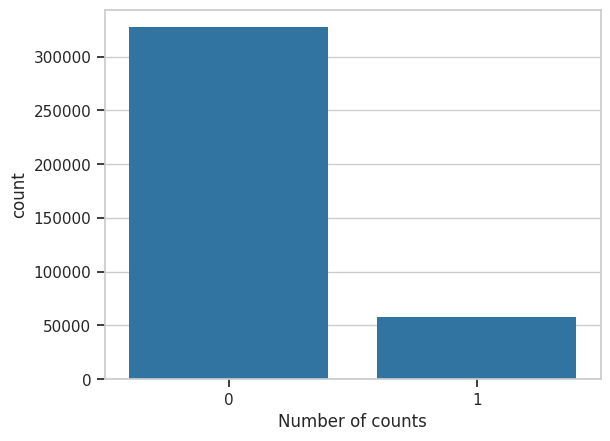

In [46]:
# Output Barplot showing the occurence of flight outcome

sns.set_context("notebook")
g=sns.countplot(x="FLIGHT_STATUS",data=flight_data)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

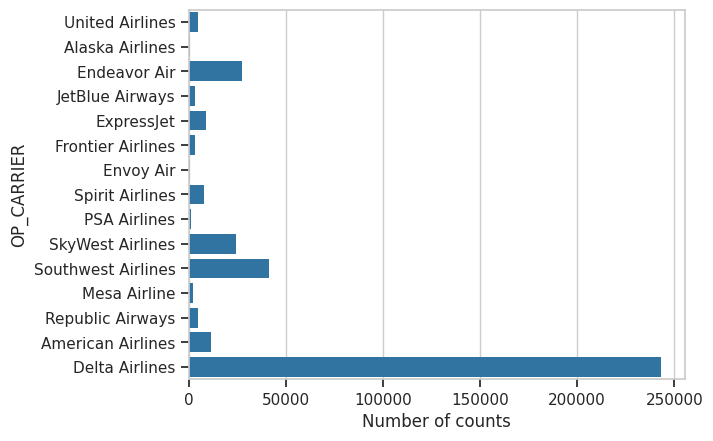

In [47]:
# Output Barplot showing the occurence of each categorical features

sns.set_context("notebook")
g=sns.countplot(y="OP_CARRIER",data=flight_category)
g.set(xlabel="Number of counts")

[Text(0.5, 0, 'Number of counts')]

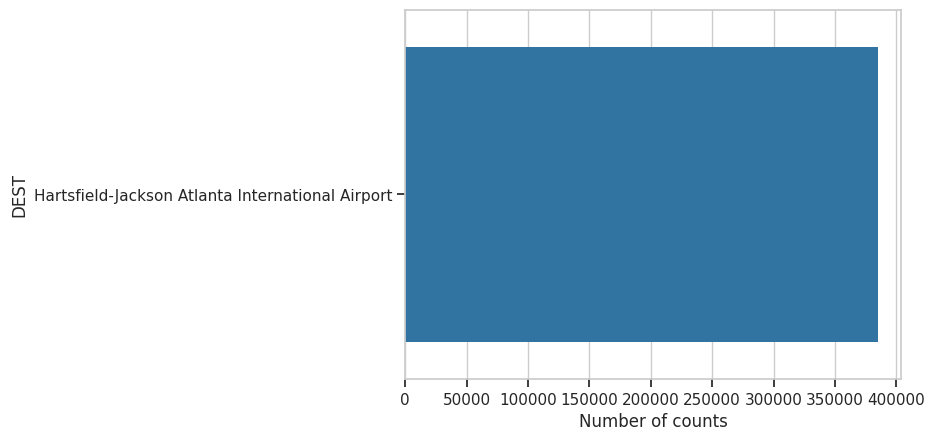

In [48]:
# Output Barplot showing the occurence of each categorical features

sns.set_context("notebook")
g=sns.countplot(y="DEST",data=flight_category)
g.set(xlabel="Number of counts")

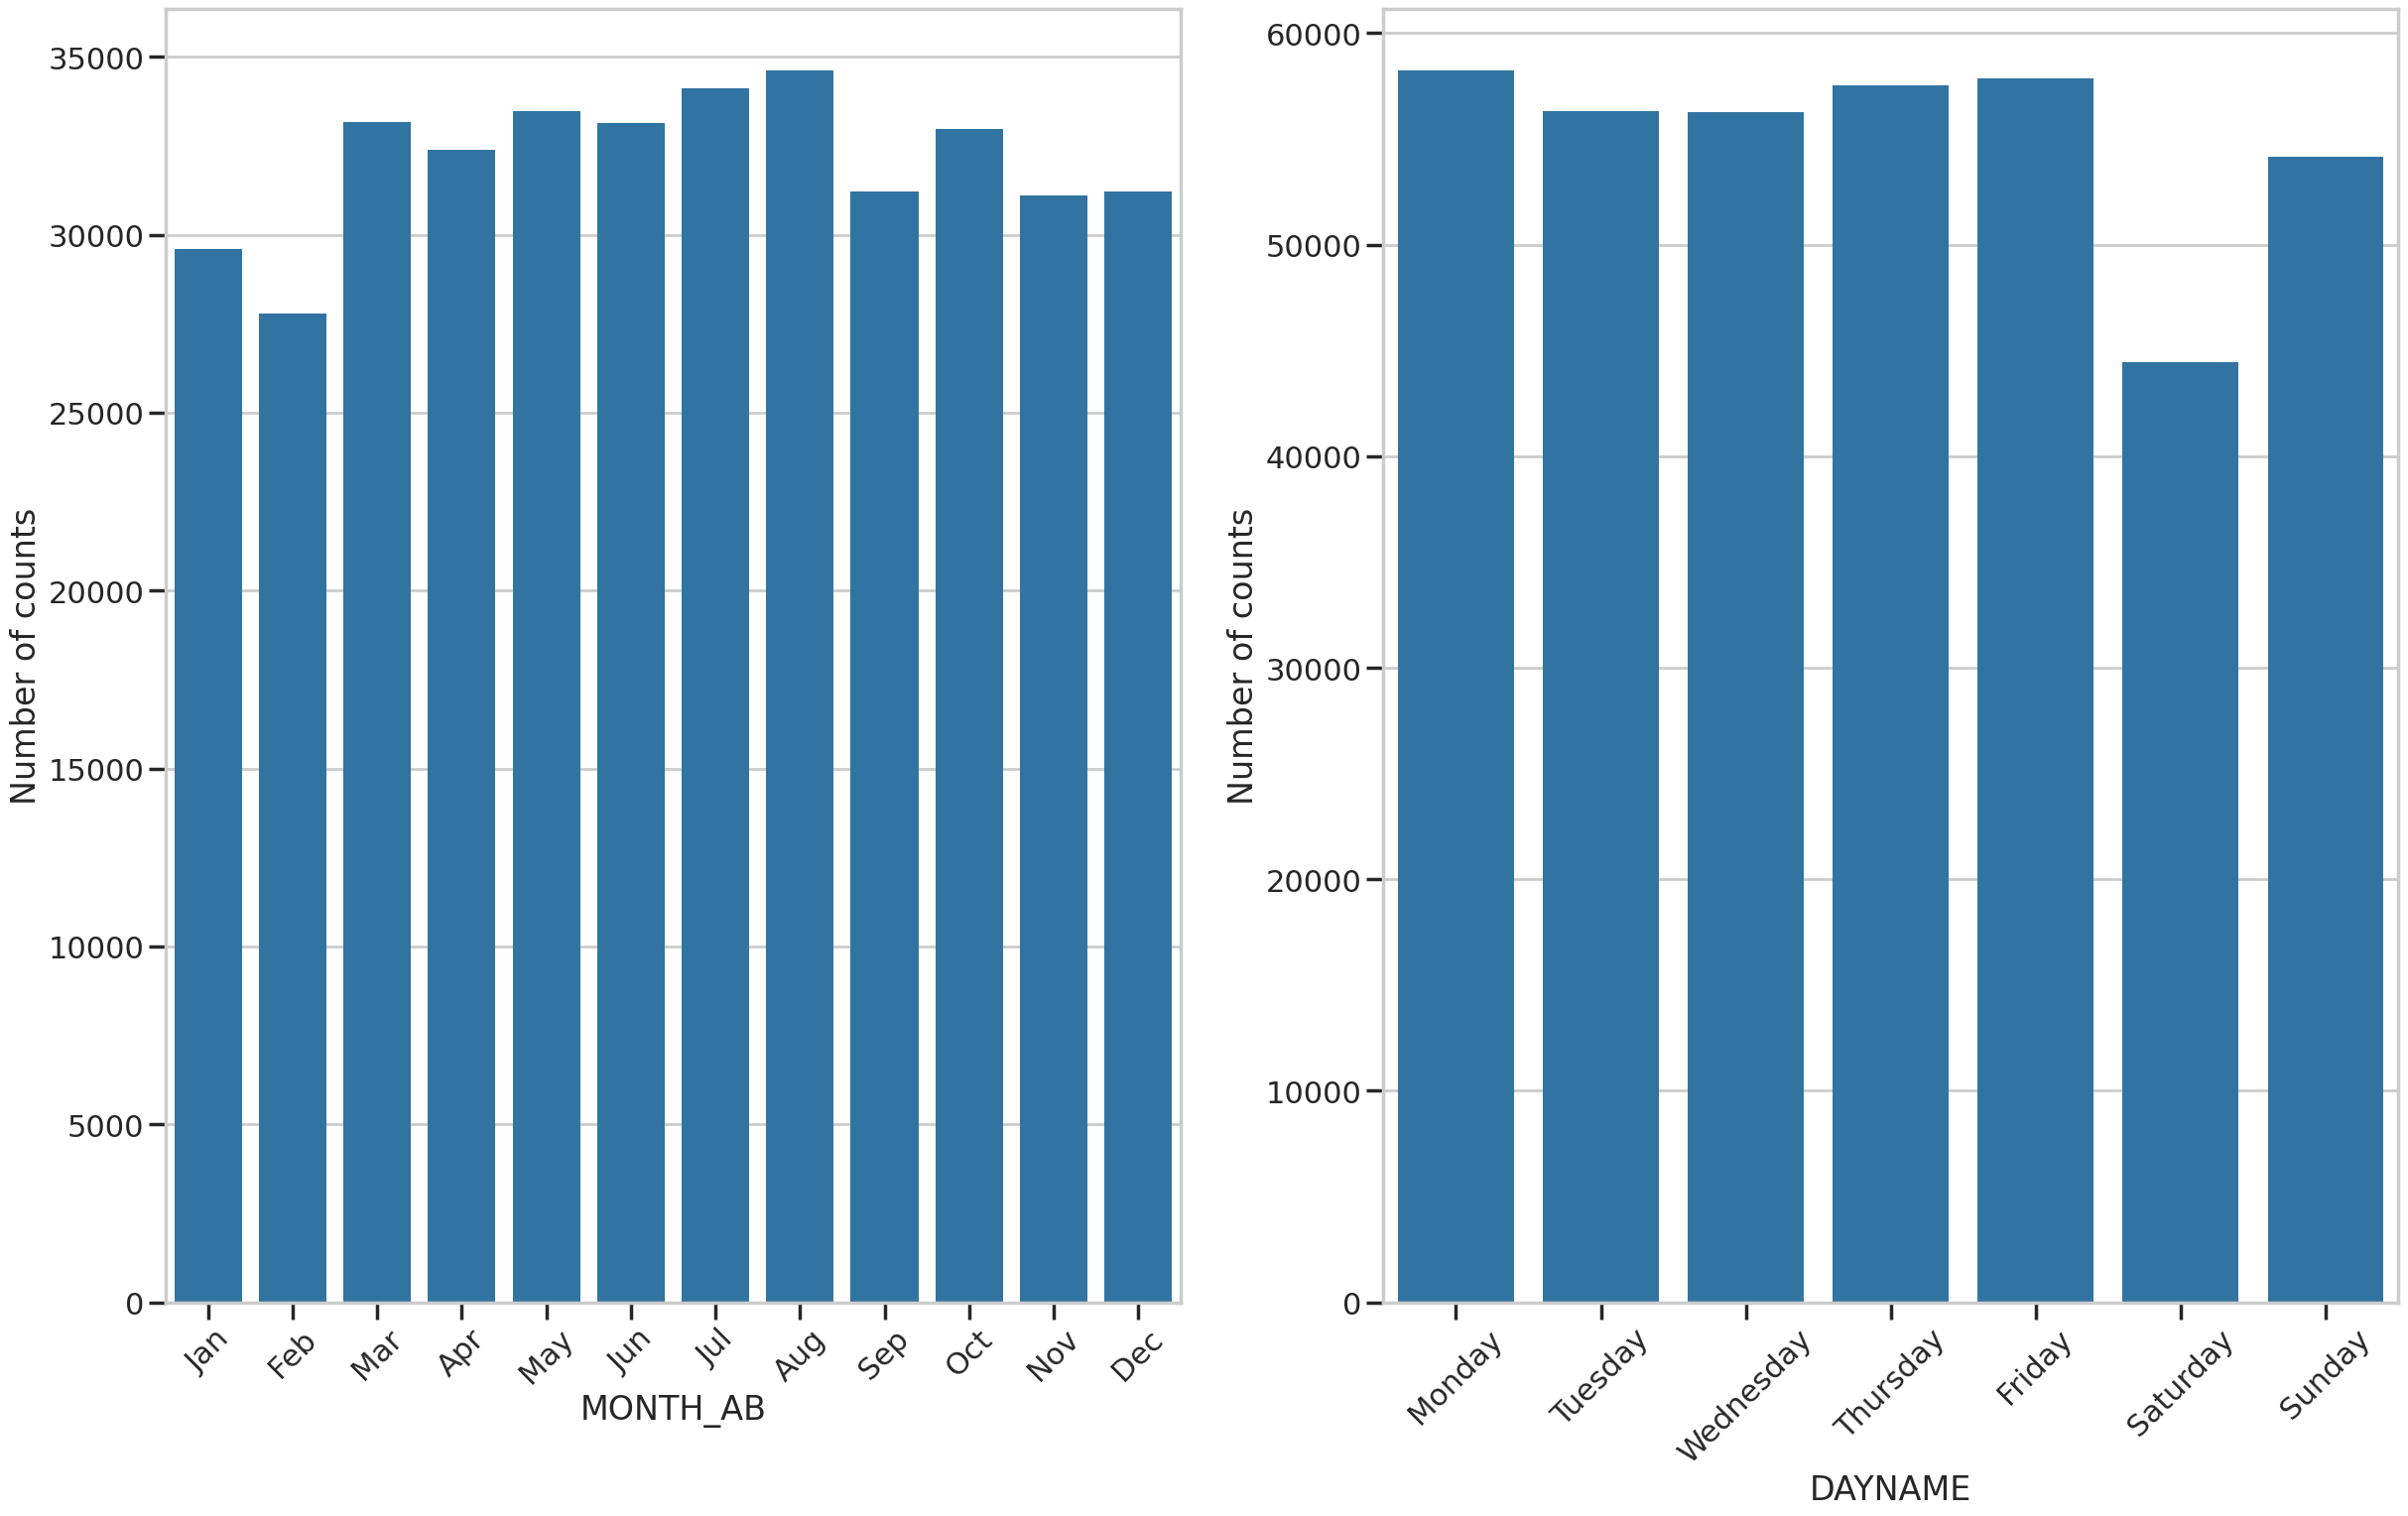

In [49]:
# Finding categorical features

category = []
for i in flight_category:
    if i in ["ORIGIN","DEST","OP_CARRIER","FLIGHT_STATUS"]:
        pass
    else:
        category.append(i)

# Output Barplot showing the occurence of each categorical features
fig, ax = plt.subplots(ncols=2, figsize=(12,12))
plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2.5)
sns.color_palette("husl", 8)
sns.set_context("poster")

#ncols=2,nrows=round(len(list(category))/2)

for i, feature in enumerate(list(flight_category[category]), 1):
    plt.subplot(len(list(category)), 2, i)
    g=sns.countplot(x=feature,data=flight_category)
    g.set(ylabel="Number of counts")
    plt.xticks(rotation=45)

plt.show()

### Classification Modelling

#### Data Preparation
- Encoding
- Feature Selection


#### One hot encoding for categorical attributes

We converted some categorical variables into numeric variables via one hot encoding method in which one dummy variable would be created for every object in the categorical variable. If the particular object is present, the value would be denoted as 1, otherwise the value would be 0.

In [50]:
Carrier = pd.get_dummies(flight_data['OP_CARRIER'],prefix="OP_CARRIER",drop_first=False)
#Destination = pd.get_dummies(flight_data['DEST'],drop_first=False)
#Destination.columns = ['Charlotte_Airport','Chicago_Airport','Dallas_Airpot','Denver_Airport','Dentroit_Airport','GELL_Airpot','George_Aiport','Hartsfield_Airport','JohnFKeenedy_Airpot','LaGuardia_Airport','LosAngelas_Airport','McCarran_Airport','MSP_Airport','NL_Airport','Orlando_Airport','Philadelphia_Airport','Phoenix_Airport','Ronald_Airport','SanFrancisco_Airport','Seattle_Aiport']
month= pd.get_dummies(flight_data['MONTH_AB'],prefix="MONTH",drop_first=False)
day= pd.get_dummies(flight_data['DAYNAME'],prefix="DAY",drop_first=False)

#flight_data_new=pd.concat([flight_data,Carrier,Destination,month,day],axis=1)
flight_data_new=pd.concat([flight_data,Carrier,month,day],axis=1)

In [51]:
flight_data_new.head(2)

,FL_DATE,OP_CARRIER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,WHEELS_OFF_elapse,WHEELS_ON_elapse,DAY,MONTH,MONTH_AB,DAYOFWEEK,DAYNAME,WEEKDAY,FLIGHT_STATUS,OP_CARRIER_Alaska Airlines,OP_CARRIER_American Airlines,OP_CARRIER_Delta Airlines,OP_CARRIER_Endeavor Air,OP_CARRIER_Envoy Air,OP_CARRIER_ExpressJet,OP_CARRIER_Frontier Airlines,OP_CARRIER_JetBlue Airways,OP_CARRIER_Mesa Airline,OP_CARRIER_PSA Airlines,OP_CARRIER_Republic Airways,OP_CARRIER_SkyWest Airlines,OP_CARRIER_Southwest Airlines,OP_CARRIER_Spirit Airlines,OP_CARRIER_United Airlines,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,MONTH_Oct,MONTH_Sep,DAY_Friday,DAY_Monday,DAY_Saturday,DAY_Sunday,DAY_Thursday,DAY_Tuesday,DAY_Wednesday
13,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,11.0,11.0,5.0,-3.0,0.0,154.0,140.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,1,1,Jan,0,Monday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
241,2018-01-01,United Airlines,Newark Liberty International Airport,Hartsfield-Jackson Atlanta International Airport,20.0,13.0,9.0,12.0,0.0,154.0,146.0,124.0,746.0,0.0,0.0,0.0,0.0,0.0,13.0,9.0,1,1,Jan,0,Monday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### Feature selection
* [Drop redundant columns](#Drop-redundant-columns)
* [Drop constant columns](#Drop-constant-columns)
* [Remove multicollinearity effect](#Remove-multicollinearity-effect)
* [Importance by Random Forest](#Importance-by-Random-Forest)

#### Drop redundant columns

In [52]:
# Drop the redundant columns

flight_data_new.drop(['FL_DATE',
                      'OP_CARRIER',
                      'ORIGIN',
                      'DEST',
                      'DAYOFWEEK',
                      'MONTH',
                      'MONTH_AB',
                      'DAY',
                      'DAYNAME',
                      'WEEKDAY',
                      'ARR_DELAY',
                      'CARRIER_DELAY',
                      'WEATHER_DELAY',
                      'NAS_DELAY',
                      'SECURITY_DELAY',
                      'LATE_AIRCRAFT_DELAY'
                 ],
                 axis = 1, inplace = True)

In [53]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384813 entries, 13 to 7213438
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      384813 non-null  float64
 1   TAXI_OUT                       384813 non-null  float64
 2   TAXI_IN                        384813 non-null  float64
 3   DIVERTED                       384813 non-null  float64
 4   CRS_ELAPSED_TIME               384813 non-null  float64
 5   ACTUAL_ELAPSED_TIME            384813 non-null  float64
 6   AIR_TIME                       384813 non-null  float64
 7   DISTANCE                       384813 non-null  float64
 8   WHEELS_OFF_elapse              384813 non-null  float64
 9   WHEELS_ON_elapse               384813 non-null  float64
 10  FLIGHT_STATUS                  384813 non-null  int64  
 11  OP_CARRIER_Alaska Airlines     384813 non-null  uint8  
 12  OP_CARRIER_American Airlines

#### Drop constant variable

In [54]:
pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 86.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 87.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 26.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [55]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import DropConstantFeatures

In [56]:
# separate train and test (again, as we transformed the previous ones)

X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((307850, 44), (76963, 44))

In [57]:
sel = DropConstantFeatures(tol=1, variables=None, missing_values='raise')
sel.fit(X_train)

DropConstantFeatures()

In [58]:
# number of quasi-constant features

len(sel.features_to_drop_)

1

In [59]:
sel.features_to_drop_

['DIVERTED']

`DIVERTED` is a constant features with only one kind of response for all instances. This does not give any information to the model, hence we will drop it.

In [60]:
# Drop the redundant columns
flight_data_new.drop(['DIVERTED'], axis = 1, inplace = True)

In [61]:
#remove the constant features

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((307850, 43), (76963, 43))

#### Remove multicollinearity effect (Positive)

In [62]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']


In [63]:
corrmat

,feature1,feature2,corr
0,AIR_TIME,CRS_ELAPSED_TIME,0.983980
1,CRS_ELAPSED_TIME,AIR_TIME,0.983980
2,DISTANCE,AIR_TIME,0.982961
3,AIR_TIME,DISTANCE,0.982961
4,DISTANCE,CRS_ELAPSED_TIME,0.981390
5,CRS_ELAPSED_TIME,DISTANCE,0.981390
6,AIR_TIME,ACTUAL_ELAPSED_TIME,0.978437
7,ACTUAL_ELAPSED_TIME,AIR_TIME,0.978437
8,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,0.968000
9,ACTUAL_ELAPSED_TIME,CRS_ELAPSED_TIME,0.968000


In [64]:
corrmat.feature1.unique()

array(['AIR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'ACTUAL_ELAPSED_TIME'],
      dtype=object)

In [65]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():

    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 1 correlated groups
out of 43 total features


In [66]:
# now we can print out each group. We see that some groups contain
# only 2 correlated features, some other groups present several features
# that are correlated among themselves.

for group in correlated_groups:
    print(group)
    print()

   feature1             feature2      corr
0  AIR_TIME     CRS_ELAPSED_TIME  0.983980
3  AIR_TIME             DISTANCE  0.982961
6  AIR_TIME  ACTUAL_ELAPSED_TIME  0.978437



In [67]:
# we can now investigate further features within one group.
# let's for example select group 1

group = correlated_groups[0]
group

,feature1,feature2,corr
0,AIR_TIME,CRS_ELAPSED_TIME,0.983980
3,AIR_TIME,DISTANCE,0.982961
6,AIR_TIME,ACTUAL_ELAPSED_TIME,0.978437


In this group, several features are highly correlated. Which one should we keep and which ones should we remove? Alternatively, we could build a machine learning algorithm using all the features from the above list, and select the more predictive one.

In [68]:
from sklearn.ensemble import RandomForestClassifier

# add all features of the group to a list
features = list(group['feature2'].unique())+['CRS_ELAPSED_TIME']

# train a random forest
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(max_depth=4, random_state=100)

In [69]:
# get the feature importance attributed by the
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']

# sort features by importance, most important first
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,ACTUAL_ELAPSED_TIME,0.522288
3,CRS_ELAPSED_TIME,0.229596
0,CRS_ELAPSED_TIME,0.162209
1,DISTANCE,0.085907


`ACTUAL_ELAPSED_TIME`,`CRS_ELAPSED_TIME`,`AIR_TIME` are highly correlated to each other as they are transformed from the same attributes. Thus, we keep `ACTUAL_ELAPSED_TIME` as it gives the greatest importance as compared to other attributes.

In [70]:
#X_train = X_train.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)
#X_test = X_test.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

In [71]:
# Drop the redundant columns
flight_data_new.drop(['CRS_ELAPSED_TIME','AIR_TIME'], axis = 1, inplace = True)

#### Remove multicollinearity effect (Negative)

In [72]:
# build a dataframe with the correlation between features
# remember that the absolute value of the correlation
# coefficient is important and not the sign

corrmat = X_train.corr()
corrmat = corrmat.abs().unstack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat <= -0.8]
corrmat = corrmat[corrmat > -1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']


In [73]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():

    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 0 correlated groups
out of 43 total features


#### Importance by Random Forest

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((307850, 41), (76963, 41))

In [75]:
rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=5)
rf.fit(X_train, y_train)
rf.feature_importances_

array([5.75290753e-01, 1.48949515e-01, 2.45394573e-02, 2.13851133e-02,
       1.22917546e-02, 1.65083824e-01, 3.40303778e-02, 2.04047761e-05,
       2.79002051e-04, 7.52589715e-03, 3.39976210e-04, 2.68026509e-05,
       2.90750215e-05, 7.83557561e-04, 3.04235484e-04, 3.31050067e-06,
       4.29584753e-05, 8.55263404e-05, 1.16527416e-03, 6.78598925e-04,
       8.59623158e-05, 1.02240298e-05, 9.84306572e-05, 2.19115828e-05,
       2.86346738e-04, 1.62219328e-04, 2.06463555e-04, 1.81809576e-04,
       1.83061410e-03, 1.68967157e-04, 9.33899939e-05, 2.12444819e-03,
       7.62887491e-04, 1.06269991e-04, 1.59718928e-04, 8.84797107e-05,
       4.38028586e-04, 3.48320341e-05, 1.22682098e-04, 8.87523234e-05,
       7.21469277e-05])

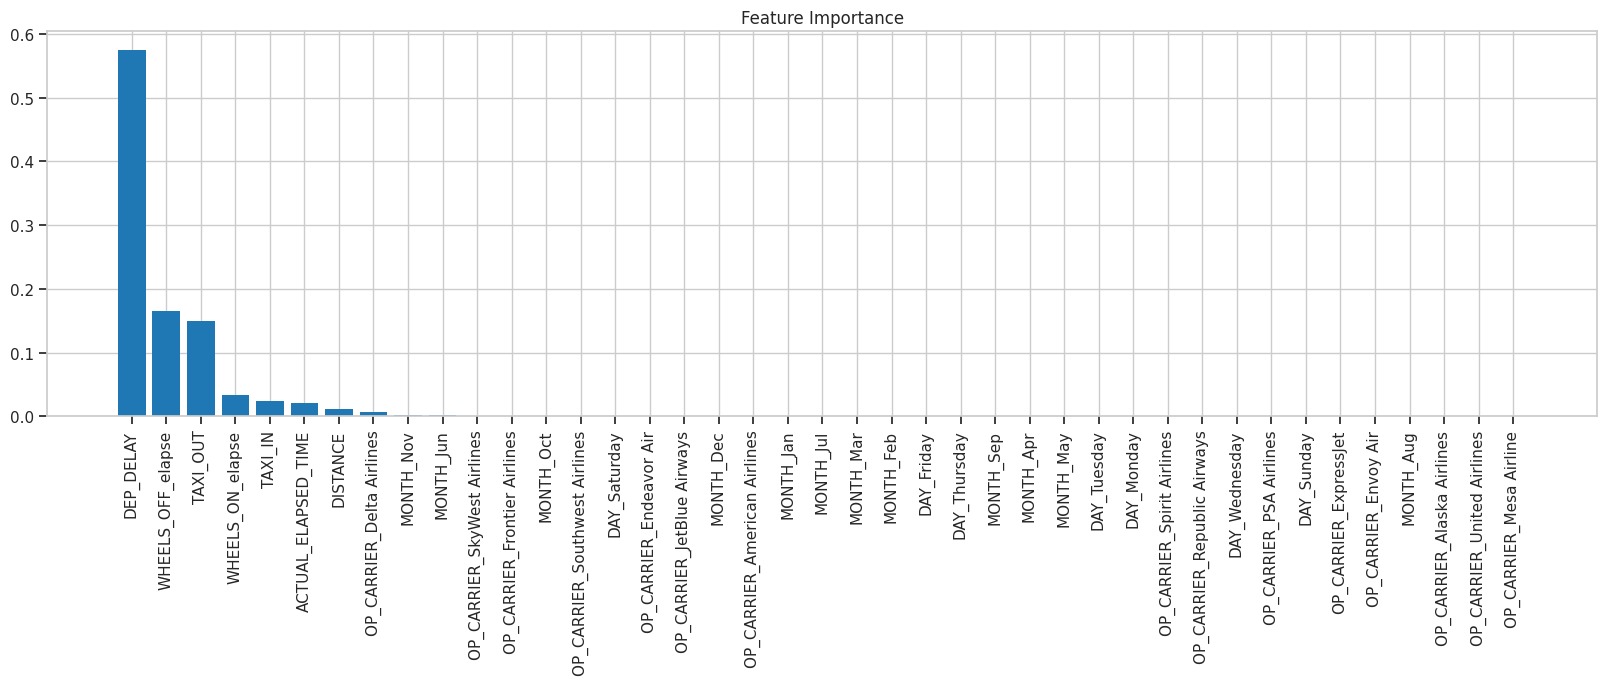

In [76]:
# Sorting in descending order and rearranging feature names to match sorted feature importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
names = [X_train.columns[i] for i in indices]

# Bar chart creation
sns.set_context("notebook")
plt.figure(figsize=(20, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), names, rotation = 90)

plt.show()

In [77]:
features=pd.DataFrame(names)
scale = pd.DataFrame(importance[indices])
keep_features = pd.concat([features, scale],axis=1)
keep_features

,0,0
0,DEP_DELAY,0.575291
1,WHEELS_OFF_elapse,0.165084
2,TAXI_OUT,0.148950
3,WHEELS_ON_elapse,0.034030
4,TAXI_IN,0.024539
5,ACTUAL_ELAPSED_TIME,0.021385
6,DISTANCE,0.012292
7,OP_CARRIER_Delta Airlines,0.007526
8,MONTH_Nov,0.002124
9,MONTH_Jun,0.001831


### Classification Modelling

In [78]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

#### Base classifiers
- Logistic regression
- SVM
- Decision Tree
- Random Forest

In [79]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384813 entries, 13 to 7213438
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DEP_DELAY                      384813 non-null  float64
 1   TAXI_OUT                       384813 non-null  float64
 2   TAXI_IN                        384813 non-null  float64
 3   ACTUAL_ELAPSED_TIME            384813 non-null  float64
 4   DISTANCE                       384813 non-null  float64
 5   WHEELS_OFF_elapse              384813 non-null  float64
 6   WHEELS_ON_elapse               384813 non-null  float64
 7   FLIGHT_STATUS                  384813 non-null  int64  
 8   OP_CARRIER_Alaska Airlines     384813 non-null  uint8  
 9   OP_CARRIER_American Airlines   384813 non-null  uint8  
 10  OP_CARRIER_Delta Airlines      384813 non-null  uint8  
 11  OP_CARRIER_Endeavor Air        384813 non-null  uint8  
 12  OP_CARRIER_Envoy Air        

In [80]:
flight_data_new["FLIGHT_STATUS"] = flight_data_new["FLIGHT_STATUS"].astype('category')

In [81]:
flight_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384813 entries, 13 to 7213438
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DEP_DELAY                      384813 non-null  float64 
 1   TAXI_OUT                       384813 non-null  float64 
 2   TAXI_IN                        384813 non-null  float64 
 3   ACTUAL_ELAPSED_TIME            384813 non-null  float64 
 4   DISTANCE                       384813 non-null  float64 
 5   WHEELS_OFF_elapse              384813 non-null  float64 
 6   WHEELS_ON_elapse               384813 non-null  float64 
 7   FLIGHT_STATUS                  384813 non-null  category
 8   OP_CARRIER_Alaska Airlines     384813 non-null  uint8   
 9   OP_CARRIER_American Airlines   384813 non-null  uint8   
 10  OP_CARRIER_Delta Airlines      384813 non-null  uint8   
 11  OP_CARRIER_Endeavor Air        384813 non-null  uint8   
 12  OP_CARRIER_Env

In [82]:
flight_data_new.to_csv('flight_data_new.csv',index=False)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    flight_data_new.drop(labels=['FLIGHT_STATUS'], axis=1),
    flight_data_new['FLIGHT_STATUS'],
    test_size=0.2,
    random_state=100)

X_train.shape, X_test.shape

((307850, 41), (76963, 41))

#### Random Forest

In [109]:
pip install mlflow azureml-mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 96.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.3/377.3 kB 37.9 MB/s eta 0:00:00


  Attempting uninstall: azure-storage-blob
    Found existing installation: azure-storage-blob 12.19.0
    Uninstalling azure-storage-blob-12.19.0:
      Successfully uninstalled azure-storage-blob-12.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
azure-storage-file-datalake 12.14.0 requires azure-storage-blob<13.0.0,>=12.19.0, but you have azure-storage-blob 12.13.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [110]:
def run_randomForests(X_train, X_test, y_train, y_test):
    import mlflow
    mlflow.autolog()
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

In [111]:
run_randomForests(X_train, X_test, y_train, y_test)

2023/11/16 11:59:48 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/11/16 11:59:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '500b9251-8188-433f-a6c9-d606db905572', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Test set


2023/11/16 12:00:25 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': '24bc2e23ec406b68af4307b5fbb3b61b', 'request': '371155bf072d992e'}, 'Environment': 'australiaeast', 'Location': 'australiaeast', 'Time': '2023-11-16T12:00:25.5326712+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}


Roc-auc Random Forests roc-auc: 0.967824946807227



2023/11/16 12:00:26 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': 'd7237f797ba8aec953a9ee6c6302389d', 'request': '2a52b8a9217e0e8c'}, 'Environment': 'australiaeast', 'Location': 'australiaeast', 'Time': '2023-11-16T12:00:26.6058888+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}


Accuracy Random Forest test: 0.8826449072931148



2023/11/16 12:00:27 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': '53762ae83ca5eeea2ec0521d31207d6e', 'request': 'b30ba3addf046ddd'}, 'Environment': 'australiaeast', 'Location': 'australiaeast', 'Time': '2023-11-16T12:00:27.7111867+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}


Precision Random Forest test: 0.9463941380640185



2023/11/16 12:00:28 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': 'aac6b5e983f755a57866618f18d7ed45', 'request': '0d277ed4693b4871'}, 'Environment': 'australiaeast', 'Location': 'australiaeast', 'Time': '2023-11-16T12:00:28.7421156+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}


Recall Random Forest test: 0.2162686172556623



2023/11/16 12:00:29 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': '09cd87ce14f48a241923dbed16a2ac9d', 'request': 'fdabd65c3e62889f'}, 'Environment': 'australiaeast', 'Location': 'australiaeast', 'Time': '2023-11-16T12:00:29.7875282+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}


F-measure Random Forest test: 0.35208034433285507

Summary Report:


2023/11/16 12:00:30 WARNING mlflow.sklearn: Failed to log evaluation dataset information to MLflow Tracking. Reason: BAD_REQUEST: Response: {'Error': {'Code': 'UserError', 'Severity': None, 'Message': 'Cannot log the same dataset with different context', 'MessageFormat': None, 'MessageParameters': None, 'ReferenceCode': None, 'DetailsUri': None, 'Target': None, 'Details': [], 'InnerError': None, 'DebugInfo': None, 'AdditionalInfo': None}, 'Correlation': {'operation': '35634090bcdf4670acc39fa46f06351e', 'request': '8345f80a681c67fc'}, 'Environment': 'australiaeast', 'Location': 'australiaeast', 'Time': '2023-11-16T12:00:30.8078716+00:00', 'ComponentName': 'mlflow', 'statusCode': 400, 'error_code': 'BAD_REQUEST'}


              precision    recall  f1-score   support

           0       0.88      1.00      0.94     65616
           1       0.95      0.22      0.35     11347

    accuracy                           0.88     76963
   macro avg       0.91      0.61      0.64     76963
weighted avg       0.89      0.88      0.85     76963



#### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
def run_logisticReg(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)

    print('Test set')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))

In [88]:
run_logisticReg(X_train, X_test, y_train, y_test)

Test set
Roc-auc Logistic Regression roc-auc: 0.9697171151372241

Accuracy Logistic Regression: 0.9483518054129907

Precision Logistic Regression: 0.8609479044261653

Recall Logistic Regression: 0.7748303516347933

F-measure Logistic Regression: 0.8156222459297741

Summary Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     65616
           1       0.86      0.77      0.82     11347

    accuracy                           0.95     76963
   macro avg       0.91      0.88      0.89     76963
weighted avg       0.95      0.95      0.95     76963



#### Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:

def run_DT(X_train, X_test, y_train, y_test):
    DT = DecisionTreeClassifier(random_state=100)
    DT = DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))


In [91]:
run_DT(X_train, X_test, y_train, y_test)

Test set
Roc-auc Decision Tree roc-auc: 0.911810166784978

Accuracy Decision Tree: 0.9553291841534244

Precision Decision Tree: 0.8474040235438812

Recall Decision Tree: 0.8500925354719309

F-measure Decision Tree: 0.8487461504619446

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     65616
           1       0.85      0.85      0.85     11347

    accuracy                           0.96     76963
   macro avg       0.91      0.91      0.91     76963
weighted avg       0.96      0.96      0.96     76963



#### Undersampling technique
- Logistic regression
- Decision Tree
- Random Forest

In [96]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 20.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [98]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from imblearn.datasets import fetch_datasets

from imblearn.under_sampling import (
    RandomUnderSampler,
    TomekLinks
)

In [99]:
def run_all(X_train, X_test, y_train, y_test):

    # Logistic regression
    lr = LogisticRegression(random_state=100)
    lr.fit(X_train, y_train)

    print('Logistic regression')
    pred = lr.predict_proba(X_test)
    print('Roc-auc Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Logistic Regression test:', accuracy_score(y_test, lr.predict(X_test)))
    print()
    print('Precision Logistic Regression test:', precision_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Recall Logistic Regression test:', recall_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('F-measure Logistic Regression test:', f1_score(y_test, lr.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, lr.predict(X_test)))



    # Decision Tree
    DT = DecisionTreeClassifier(random_state=100)
    DT.fit(X_train,y_train)

    print('Test set')
    pred = DT.predict_proba(X_test)
    print('Roc-auc Decision Tree roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Decision Tree:', accuracy_score(y_test, DT.predict(X_test)))
    print()
    print('Precision Decision Tree:', precision_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Recall Decision Tree:', recall_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('F-measure Decision Tree:', f1_score(y_test, DT.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, DT.predict(X_test)))


    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=100, max_depth=4)
    rf.fit(X_train, y_train)

    print('Random Forest')
    pred = rf.predict_proba(X_test)
    print('Roc-auc Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
    print()
    print('Accuracy Random Forest test:', accuracy_score(y_test, rf.predict(X_test)))
    print()
    print('Precision Random Forest test:', precision_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Recall Random Forest test:', recall_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('F-measure Random Forest test:', f1_score(y_test, rf.predict(X_test),pos_label=1))
    print()
    print('Summary Report:')
    print(classification_report(y_test, rf.predict(X_test)))

    print()
    print()


In [100]:
undersampler_dict = {

    'random': RandomUnderSampler(
        sampling_strategy='auto',
        random_state=100,
        replacement=False)
}

In [101]:
datasets_ls = ['flight_data_new']

In [102]:
for dataset in datasets_ls:

    print('Full data')

    run_all(X_train, X_test, y_train, y_test)

    print()

    for undersampler in undersampler_dict.keys():

        print(undersampler)

        # resample
        X_resampled, y_resampled = undersampler_dict[undersampler].fit_resample(X_train, y_train)

        run_all(X_resampled, X_test, y_resampled, y_test)

        print()



Full data
Logistic regression
Roc-auc Logistic Regression roc-auc: 0.9697171151372241

Accuracy Logistic Regression test: 0.9483518054129907

Precision Logistic Regression test: 0.8609479044261653

Recall Logistic Regression test: 0.7748303516347933

F-measure Logistic Regression test: 0.8156222459297741

Summary Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     65616
           1       0.86      0.77      0.82     11347

    accuracy                           0.95     76963
   macro avg       0.91      0.88      0.89     76963
weighted avg       0.95      0.95      0.95     76963

Test set
Roc-auc Decision Tree roc-auc: 0.911810166784978

Accuracy Decision Tree: 0.9553291841534244

Precision Decision Tree: 0.8474040235438812

Recall Decision Tree: 0.8500925354719309

F-measure Decision Tree: 0.8487461504619446

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97 

#### Oversampling

In [103]:
from imblearn.over_sampling import (
    RandomOverSampler
)

In [104]:
oversampler_dict = {

    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=100)
}

In [105]:

for dataset in datasets_ls:

    print(dataset)

    run_all(X_train, X_test, y_train, y_test)

    print()

    for oversampler in oversampler_dict.keys():

        print(oversampler)

        # resample
        X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)

        print("Status check: Done resampling")
        # evaluate performance
        run_all(X_resampled, X_test, y_resampled, y_test)
        print()

    print()

flight_data_new
Logistic regression
Roc-auc Logistic Regression roc-auc: 0.9697171151372241

Accuracy Logistic Regression test: 0.9483518054129907

Precision Logistic Regression test: 0.8609479044261653

Recall Logistic Regression test: 0.7748303516347933

F-measure Logistic Regression test: 0.8156222459297741

Summary Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     65616
           1       0.86      0.77      0.82     11347

    accuracy                           0.95     76963
   macro avg       0.91      0.88      0.89     76963
weighted avg       0.95      0.95      0.95     76963

Test set
Roc-auc Decision Tree roc-auc: 0.911810166784978

Accuracy Decision Tree: 0.9553291841534244

Precision Decision Tree: 0.8474040235438812

Recall Decision Tree: 0.8500925354719309

F-measure Decision Tree: 0.8487461504619446

Summary Report:
              precision    recall  f1-score   support

           0       0.97      0.97     